<h1>Ragy Ibrahim</h1>

<h2>Data Collection</h2>

<ul>
    Part 1:
    <ul>
        <li>
            Data Collection is a vital step in any successful machine learning project. Wihtout clean, realiable data one can not train a model to perform any meanigful predictions. This step allows the collection of data points that will serve as input to the model.
        </li>
        </ul>
</ul>

<ul>
    Part 2:
    <ul>
        <li>
            The list of ADLs are: 'Laying',
 'Sitting',
 'Standing',
 'Walking',
 'Walking_Downstairs' and
 'Walking_Upstairs'
        </li>
        <li>
This experiment included 30 volunteers
        </li>
        </ul>
</ul>

<ul>
    Part 3:
    <ul>
        <li>
        The training dataset has 7352 rows and 561 features</li>
        <li>The testing dataset has 2947 rows and 561 features</li>
        </ul>
</ul>

<ul>
    Part 4:
    <ul>
        <li>
            A Support vector machine (SVM) model with a Gaussian kernel is genralised to the multi-class case using a One-Vs-All (OVA) approach. The model hyperparameters were chosen using a 10-Fold Cross validation. This model produced an over an overall accuracy of 96%
        </li>
        <li>
This experiment included 30 volunteers
        </li>
        </ul>
</ul>



<h2>Data Wrangling and Preprocessing</h2>

<h3>Import all required Modules</h3>

In [74]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from matplotlib import cm
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import re
from math import *

<h3>File Paths</h3>

In [3]:
feature_path = '/Users/ragyibrahim/Documents/Uni/2019/Trimester 2/SIT720/AT4/AssessmentTask4/features.txt'
X_train_path = '/Users/ragyibrahim/Documents/Uni/2019/Trimester 2/SIT720/AT4/AssessmentTask4/train/X_train.txt'
y_train_path = '/Users/ragyibrahim/Documents/Uni/2019/Trimester 2/SIT720/AT4/AssessmentTask4/train/y_train.txt'
X_test_path = '/Users/ragyibrahim/Documents/Uni/2019/Trimester 2/SIT720/AT4/AssessmentTask4/test/X_test.txt'
y_test_path = '/Users/ragyibrahim/Documents/Uni/2019/Trimester 2/SIT720/AT4/AssessmentTask4/test/y_test.txt'

<h3>Clean String Function</h3>

In [4]:
#Clean Text
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_text(text):
    text = [REPLACE_NO_SPACE.sub("", line.lower()) for line in text]
    text = [REPLACE_WITH_SPACE.sub(" ", line) for line in text]
    
    return text

<h3>Import Training and Testing Data function</h3>

In [5]:
def import_X(df_path, feature_path):
    df = pd.read_csv(df_path, lineterminator='\n', header= None, names="a")
    feature_names = pd.read_csv(feature_path, sep = '\t', header=None, names= "F")
    preprocess_text(feature_names['F'])
    df = df.a.str.split(expand=True)
    df.columns = feature_names['F']
    df = df.apply(lambda x: pd.to_numeric(x))
    if 'train' in df_path:
        globals()['Xtrain'] = df
    else:
        globals()['Xtest'] = df
    return df.head()

In [6]:
#Import Training data
import_X(X_train_path, feature_path)

F,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
#Import Testing data
import_X(X_test_path, feature_path)

F,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [8]:
#Print dataset features and rows
print("The training dataset has {} rows and {} features".format(Xtrain.shape[0], Xtrain.shape[1]))
print("The testing dataset has {} rows and {} features".format(Xtest.shape[0], Xtest.shape[1]))

The training dataset has 7352 rows and 561 features
The testing dataset has 2947 rows and 561 features


<h3>Import Training and Testing Response Variables</h3>

In [9]:
#Import Y-Train data
yTrain = pd.read_csv(y_train_path, header= None, names='Y')

In [10]:
#Import Y-Train data
yTest = pd.read_csv(y_test_path, header= None, names='Y')

In [11]:
#Map Unique Numbers to Class Names
def map_classes(df):
    mydict={
        1:'Walking',
            2:'Walking_Upstairs',
            3:'Walking_Downstairs', 
            4:'Sitting', 
            5:'Standing', 
            6:'Laying'
           }
    i = 0
    for item in df:
        if(i>=0 and item in mydict):
            continue
        else:    
           i = i+1
           mydict[item] = i+1

    k=[]
    for item in df:
        k.append(mydict[item])
    return k

In [12]:
#Add Class Names to Training outcome variable
yTrain = pd.DataFrame(map_classes(yTrain['Y']))
yTrain.columns = ['Y']
yTrain_label = yTrain['Y']

In [13]:
#Add Class Names to Testing outcome variable
yTest = pd.DataFrame(map_classes(yTest['Y']))
yTest.columns = ['Y']
yTest_label = yTest['Y']

In [14]:
#Get unique classes
uniqueClasses = sorted(yTrain['Y'].unique().tolist(), reverse=False)

In [15]:
#Function to print and plot class distribution
def freqViz(df):
    g = df.iloc[:,0].value_counts()
    h = df.iloc[:,0].value_counts().plot('bar')
    plt.show()
    return g , h

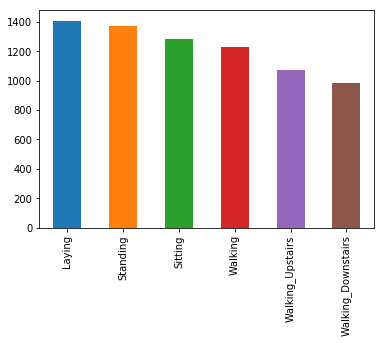

(Laying                1407
 Standing              1374
 Sitting               1286
 Walking               1226
 Walking_Upstairs      1073
 Walking_Downstairs     986
 Name: Y, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a20592190>)

In [16]:
freqViz(yTrain)

From the above graph we can see that there's a clear class imbalance - therefore accuracy is not a good measure of model performace as it rewards models that predict the most prevelant class. Also, using 

In [17]:
#Find missing values
Xtrain[Xtrain.isnull().any(axis=1)]

F,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"


<h3>Dimensionality Reduction</h3>

<h4>Principle Component Analysis</h4>

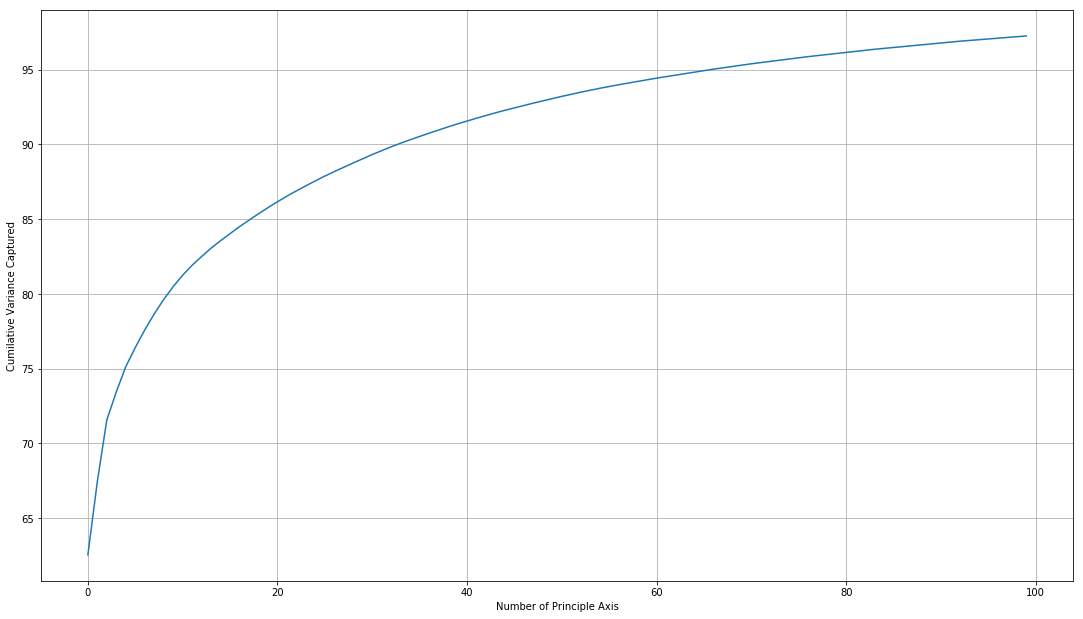

In [18]:
#Principle Component Analysis
pca = PCA(n_components=100)
pca.fit(Xtrain)

#Find the variance captured by each Principle Axis
pca_variance = pca.explained_variance_ratio_

#Plot Cumilative Variance
pca_cum = np.cumsum(np.round(pca_variance, decimals=4)*100)
plt.figure()
plt.plot(pca_cum, '-')
plt.xlabel("Number of Principle Axis")
plt.ylabel("Cumilative Variance Captured")
plt.grid(which='both')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)

From the above graph we can see that at K = 65 (i.e. 65 principle compenents) w can capture ~95% of the variation included in the data. This will allows us to retain as much information gain as possible while dramatically decreaing the number of varibles we use in our models (from 560 to 65)

<h4>Fit PCA model to data</h4>

In [19]:
#Fit PCA model and apply reduction
pca_final = PCA(n_components=65)
Xtrain_pca = pca_final.fit_transform(Xtrain)
Xtest_pca = pca_final.fit_transform(Xtest)
#Examine new shape
print(Xtrain_pca.shape)
print(Xtest_pca.shape)

(7352, 65)
(2947, 65)


<h2>Machine Learning</h2>

<h3>Using F1-Scoring in GridsearchCV</h3>

In [20]:
#Using F1-Scoring
f1 = make_scorer(f1_score , average='macro')

In [21]:
#Cross Validation with Shuffling
from sklearn.model_selection import KFold
cv_shuffle = KFold(n_splits = 10,
                   shuffle = True,
                   random_state = 42)

<h3>K-Nearest Neighbour Classifier</h3>

In [22]:
#Set Range for K
k_range = range(1,51)
knn_param_grid = { 
    'n_neighbors': k_range
}

In [71]:
#build KNN using 5 neighbours
knn_class = KNeighborsClassifier()

<h4>Cross-Validation</h4>

In [72]:
knn_cv = GridSearchCV(estimator = knn_class,
                      param_grid =knn_param_grid,
                      cv=cv_shuffle,
                      scoring = f1,
                      return_train_score = True)

In [75]:
knn_cv_fit = knn_cv.fit(Xtrain_pca, 
                        yTrain_label)

In [76]:
#print best parameters 
print ("The optimal K-Nearest Neighbour Model has {} neighbours".format(knn_cv_fit.best_params_['n_neighbors']))

The optimal K-Nearest Neighbour Model has 3 neighbours


<h4>Fit Optimal Model</h4>

In [77]:
#Build Optimal KNN Classifier
knn_class_optimal = KNeighborsClassifier(n_neighbors= 3)

In [78]:
#Fit model to training data
knn_class_optimal.fit(Xtrain_pca, yTrain_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
#Predict Using final model
knn_optimal_predict = knn_class_optimal.predict(Xtest_pca)

<h4>Evaluating Model Performance</h4>

In [80]:
def evaluateModel(yPredict,yTrue, classes):
    acc = np.round(accuracy_score(yTrue, yPredict), decimals=4)
    f1 = np.round(metrics.f1_score(yTrue, yPredict, average='macro'), decimals=4)
    print('Model Accuracy is: {}'.format(acc))
    print('Model F1 Score is: {}'.format(f1))
    cm = metrics.confusion_matrix(yTrue, yPredict)
    index = classes  
    columns = classes
    cm_df = pd.DataFrame(cm,columns,index)                      
    plt.figure(figsize=(10,6))  
    sns.heatmap(cm_df, annot=True)

Model Accuracy is: 0.5925
Model F1 Score is: 0.587


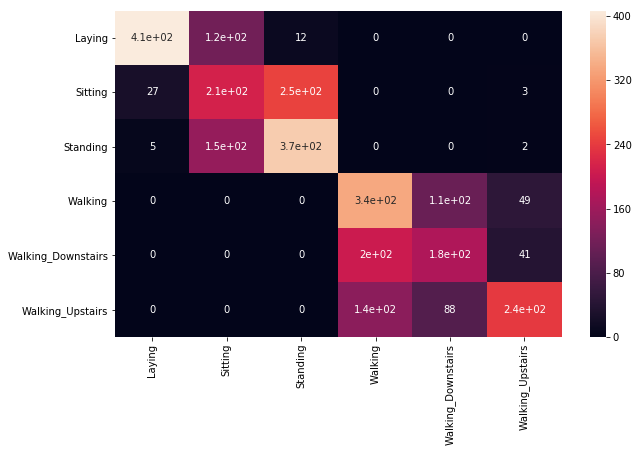

In [81]:
evaluateModel(knn_optimal_predict,yTest_label,uniqueClasses)

<h3>Logistic Regression Classifier</h3>
<h4>Setup Classifier</h4>

In [25]:
#Define ranges for pramaters
alpha_range = np.float64(['1e-4','3e-4','1e-3','3e-3', '1e-2','3e-2'])
l1_ratio = np.array([0,0.15,0.5,0.7,1])
log_param_grid = { 
    'alpha': alpha_range,
    'l1_ratio': l1_ratio
}

In [26]:
log_class = SGDClassifier(penalty='elasticnet', 
                          class_weight = 'balanced', 
                          max_iter = 1000, 
                          tol = 1e-3,
                          n_job = -1)

<h4>Grid-Search Cross-Validation</h4>

In [27]:
#Setup cross-validation model
log_cv = GridSearchCV(estimator = log_class,
                      param_grid =log_param_grid,
                      cv=cv_shuffle,
                      scoring = f1,
                      return_train_score = True)

In [29]:
log_cv_fit = log_cv.fit(Xtrain_pca, 
                        yTrain_label)

In [31]:
#print best parameters 
print ("The optimal Logistic Regression Model has an Alpha of {} and an L1-Ratio of {}".format(log_cv_fit.best_params_['alpha'], log_cv_fit.best_params_['l1_ratio']))

The optimal Logistic Regression Model has an Alpha of 0.0001 and an L1-Ratio of 0.5


<h4>Surface Plot</h4>

In [32]:
#Create dataframe of scores and parameter values
log_scores = pd.DataFrame(log_cv_fit.cv_results_)

In [33]:
#Find Optimal Prameters
log_opti = log_scores['rank_test_score'] == 1
log_optimal_run = log_scores[log_opti]
log_z = log_optimal_run['mean_test_score']
log_x = log_optimal_run['param_alpha']
log_y = log_optimal_run['param_l1_ratio']

In [62]:
log_optimal_run

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,0.266781,0.001705,0.967902,0.973354,0.0001,0.5,"{u'alpha': 0.0001, u'l1_ratio': 0.5}",1,0.97584,0.973852,...,0.969361,0.974639,0.968058,0.97135,0.971268,0.974831,0.01473,0.000095,0.007743,0.001404


In [34]:
#Set X,Y,Z Coordinates
x_log = log_scores['param_alpha'].values
y_log = log_scores['param_l1_ratio'].values
z_log = log_scores['mean_test_score'].values

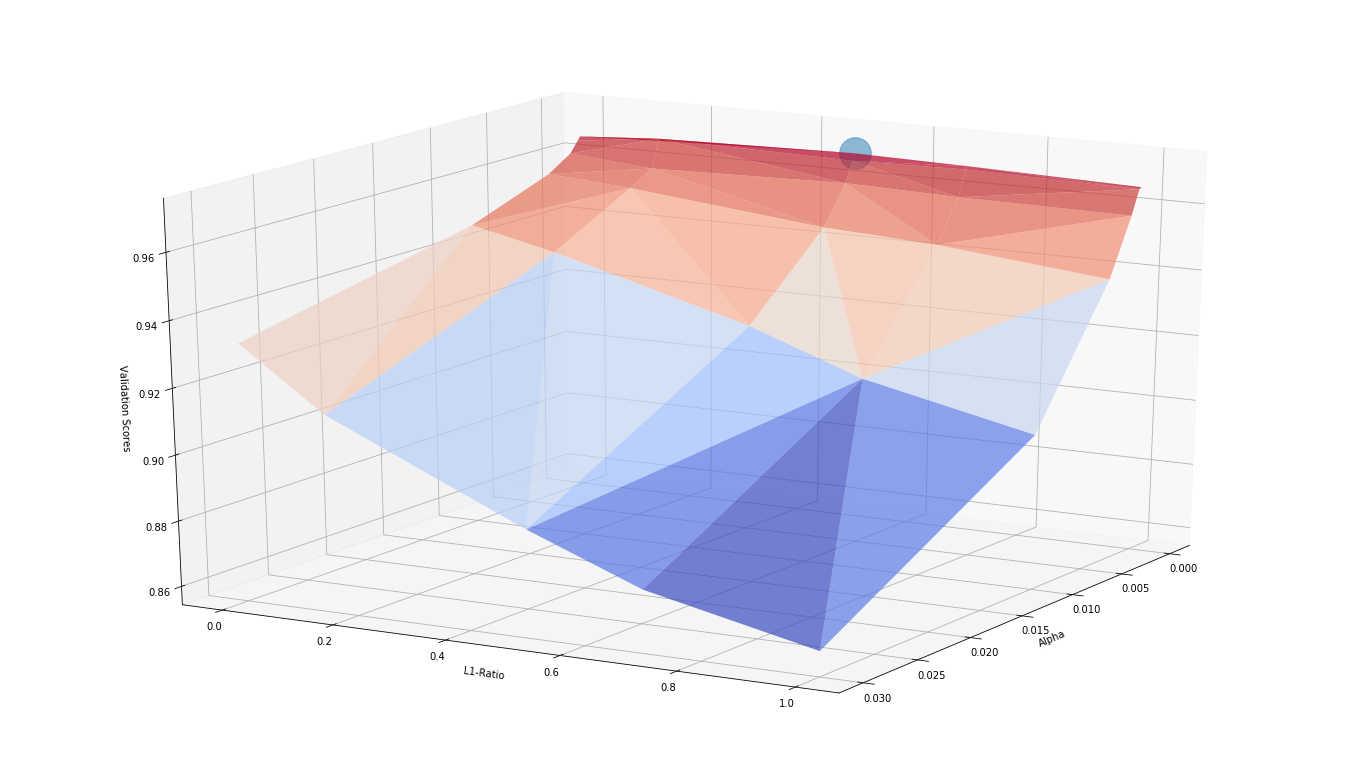

In [91]:
#Plot 3D Surface plot
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(list(x_log), list(y_log), list(z_log), cmap=cm.coolwarm, alpha=0.7)
#Mark Optimal Paramters on Graph
ax.scatter3D(log_x, log_y, log_z, s= 1000, marker = 'o', alpha = 0.5)
ax.set_xlabel('Alpha')
ax.set_ylabel('L1-Ratio')
ax.set_zlabel('Validation Scores')
ax.dist=12
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward= True)
ax.view_init(elev=20, azim=30)
plt.show()

<h4>Fit Optimal Model</h4>

In [96]:
#Model using optimal hyperparameter values
log_class_optimal = SGDClassifier(penalty='elasticnet',
                                  class_weight = 'balanced',
                                  alpha = 0.0001,
                                  l1_ratio = 0.5,
                                 tol = 1e-3,
                                 max_iter = 1000)

In [97]:
#Fit model to training data
log_class_optimal.fit(Xtrain_pca, yTrain_label)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.5, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
#Predict Using final model
log_optimal_predict = log_class_optimal.predict(Xtest_pca)

<h4>Evaluate Model Performace</h4>

Model Accuracy is: 0.6359
Model F1 Score is: 0.6259


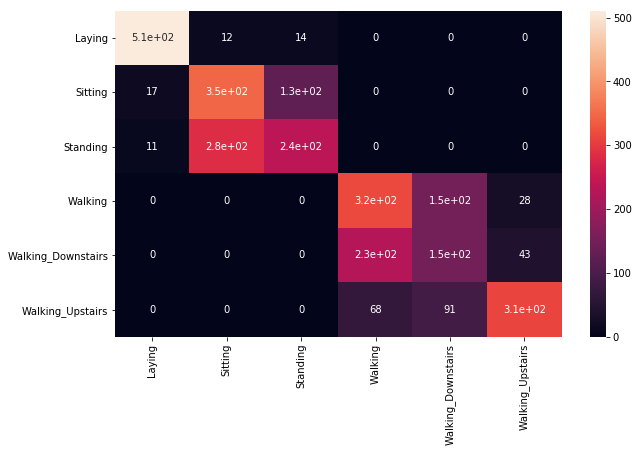

In [99]:
evaluateModel(log_optimal_predict,yTest_label,uniqueClasses)

<h4>Comments</h4>

The training model showed an average F1-Score of over 90%. When this model was used to predict calsses using the previously unseen testing dataset it only achieved an F1-Score of ~63%. This is a clear sign of overfitting and suggests that the model overl complex and does not generalise well. 

<h3>Support Vector Machine Classifier</h3>

<h4>Setup Classifier</h4>

In [45]:
#Define ranges for pramaters
gamma_range = np.float64(['1e-3','1e-4'])
c_range = np.array([1,10,100,1000])
svm_param_grid = { 
    'gamma': gamma_range,
    'C': c_range
}

In [118]:
#Setup classifier
svm_class = svm.SVC(class_weight = 'balanced',
                    kernel = 'rbf',
                    decision_function_shape = 'ova',
                    random_state = 42)

<h4>Grid Search CV</h4>

In [119]:
#Setup cross-validation model
svm_cv = GridSearchCV(estimator = svm_class,
                      param_grid =svm_param_grid,
                      cv=cv_shuffle,
                      scoring = f1,
                      return_train_score = True)

In [120]:
#Hyperparameter tuning using GridSearch CV
svm_cv_fit = svm_cv.fit(Xtrain_pca, 
                        yTrain_label)

In [121]:
#print best parameters 
print ("The optimal SVM Model has a Gamma of {} and a C of {}".format(svm_cv_fit.best_params_['gamma'], svm_cv_fit.best_params_['C']))

The optimal SVM Model has a Gamma of 0.001 and a C of 1000


<h4>Surface Plot</h4>

In [115]:
#Create dataframe of scores and parameter values
svm_scores = pd.DataFrame(svm_cv_fit.cv_results_)

In [116]:
#Find Optimal Prameters
svm_opti = svm_scores['rank_test_score'] == 1
svm_optimal_run = svm_scores[svm_opti]
svm_z = svm_optimal_run['mean_test_score']
svm_x = svm_optimal_run['param_gamma']
svm_y = svm_optimal_run['param_C']

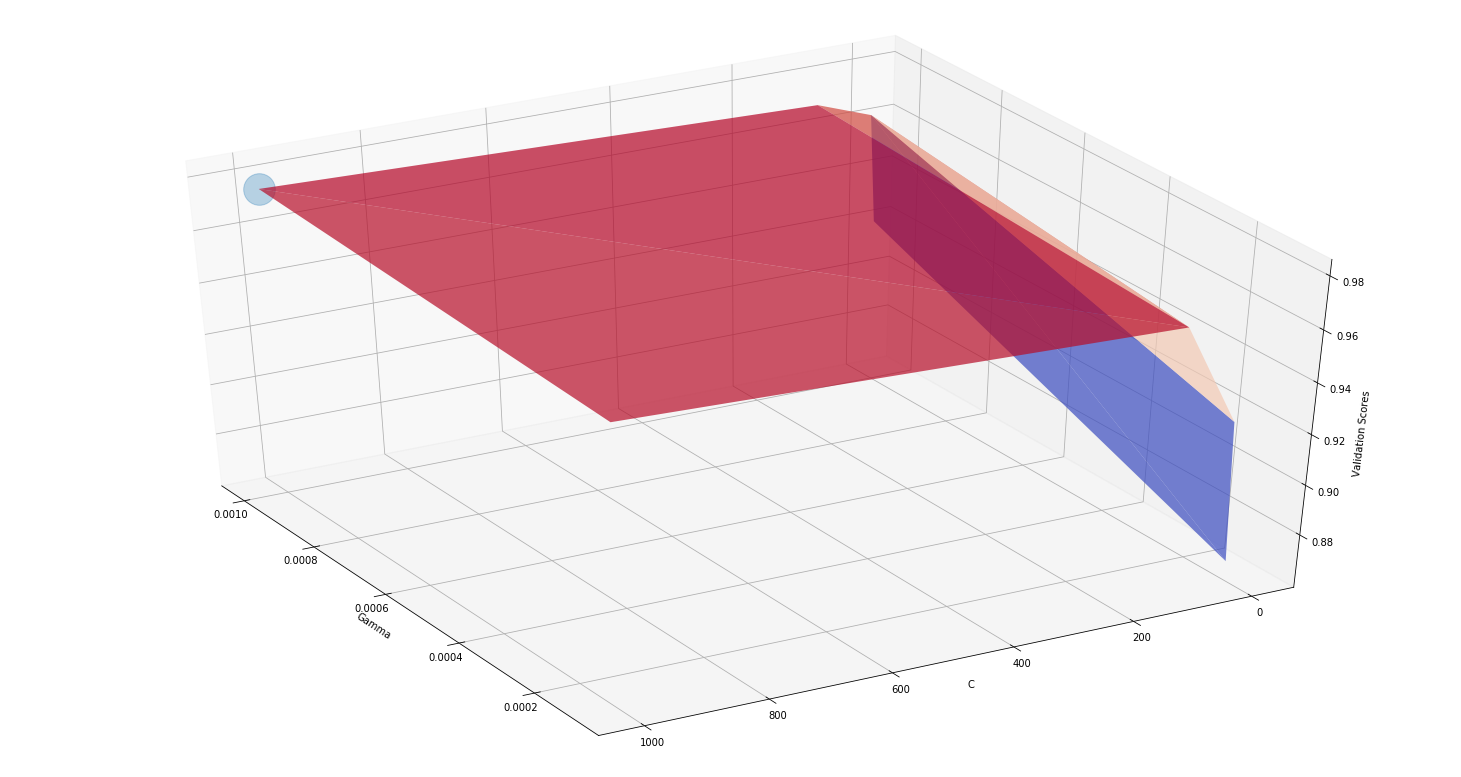

In [117]:
#Plot 3D Surface plot
fig = plt.figure()
ax = Axes3D(fig)
x_svm = svm_scores['param_gamma'].values
y_svm = svm_scores['param_C'].values
z_svm = svm_scores['mean_test_score'].values
ax.plot_trisurf(list(x_svm), list(y_svm), list(z_svm), cmap=cm.coolwarm, alpha=0.7)
#Mark Optimal Paramters on Graph
ax.scatter3D(svm_x, svm_y, svm_z, s= 1000, alpha = 0.3)
#Graph Labels
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('Validation Scores')
ax.dist=12
fig = plt.gcf()
fig.set_size_inches(20, 10.5, forward= True)
ax.view_init(elev=40, azim=150)
plt.show()

<h4>Describe Surface-Plot</h4>

The Surface plot above shows how varying paramers **gamma** and **C** affect validation scores. 
We can see from the graph that in this instance, both gamma and C seem to have a positive proportional relationship with the validation score. That is as both increase, validation F1-Score also increases.

<h4>Fit Optimal Model</h4>

In [53]:
#Setup classifier
svm_class_optimal = svm.SVC(class_weight = 'balanced',
                            kernel = 'rbf',
                            decision_function_shape = 'ovo',
                            random_state = 42,
                            gamma = 0.001,
                            C = 1000,
                            max_iter = 100)

In [54]:
#Fit model to training data
svm_class_optimal.fit(Xtrain_pca, yTrain_label)

/Users/ragyibrahim/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=100, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
#Predict Using final model
svm_optimal_predict = svm_class_optimal.predict(Xtest_pca)

<h4>Evaluate Model Performance</h4>

Model Accuracy is: 0.5718
Model F1 Score is: 0.5698


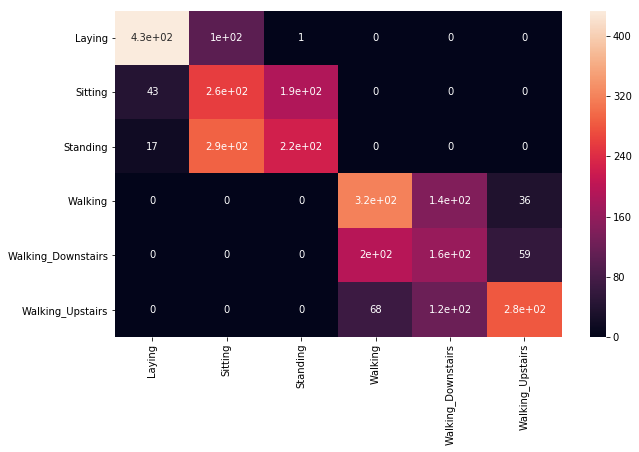

In [56]:
#Confusion Matrix
evaluateModel(svm_optimal_predict,yTest_label,uniqueClasses)

<h4>Comments</h4>

Once again huge difference between training and testing score. Sign of overfitting!

<h3>Random Forest Classifier</h3>

<h4>Setup Classifier</h4>

In [58]:
#Define ranges for pramaters
depth_range = np.array([300, 500, 600])
tree_range = np.array([200,500, 700])
rf_param_grid = { 
    'n_estimators': tree_range,
    'max_depth': depth_range
}

In [59]:
rf_class = RandomForestClassifier(bootstrap=True,
                                  class_weight = 'balanced_subsample',
                                  random_state = 42,
                                 oob_score = True, 
                                 n_jobs = -1)

<h4>Grid Search CV</h4>

In [60]:
#Setup cross-validation model
rf_cv = GridSearchCV(estimator = rf_class,
                      param_grid =rf_param_grid,
                      cv=cv_shuffle,
                      scoring = f1,
                      return_train_score = True)

In [61]:
#Hyperparameter tuning using GridSearch CV
rf_cv_fit = rf_cv.fit(Xtrain_pca, 
                        yTrain_label)

In [63]:
#print best parameters 
print ("The optimal Random Forest Model has {} Trees with a Tree Depth of {}".format(rf_cv_fit.best_params_['max_depth'], rf_cv_fit.best_params_['n_estimators']))

The optimal Random Forest Model has 300 Trees with a Tree Depth of 700


<h4>Surface Plot</h4>

In [64]:
#Create dataframe of scores and parameter values
rf_scores = pd.DataFrame(rf_cv_fit.cv_results_)

In [65]:
#Find Optimal Prameters
rf_opti = rf_scores['rank_test_score'] == 1
rf_optimal_run = rf_scores[rf_opti]
rf_z = rf_optimal_run['mean_test_score']
rf_x = rf_optimal_run['param_max_depth']
rf_y = rf_optimal_run['param_n_estimators']

In [100]:
rf_optimal_run

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,6.047658,0.287613,0.95284,1.0,300,700,"{u'n_estimators': 700, u'max_depth': 300}",1,0.965506,1.0,...,0.948159,1.0,0.953079,1.0,0.950236,1.0,0.354524,0.058531,0.007337,0.0
5,6.371097,0.346319,0.95284,1.0,500,700,"{u'n_estimators': 700, u'max_depth': 500}",1,0.965506,1.0,...,0.948159,1.0,0.953079,1.0,0.950236,1.0,0.361720,0.012973,0.007337,0.0
8,6.033265,0.323326,0.95284,1.0,600,700,"{u'n_estimators': 700, u'max_depth': 600}",1,0.965506,1.0,...,0.948159,1.0,0.953079,1.0,0.950236,1.0,0.251601,0.052656,0.007337,0.0


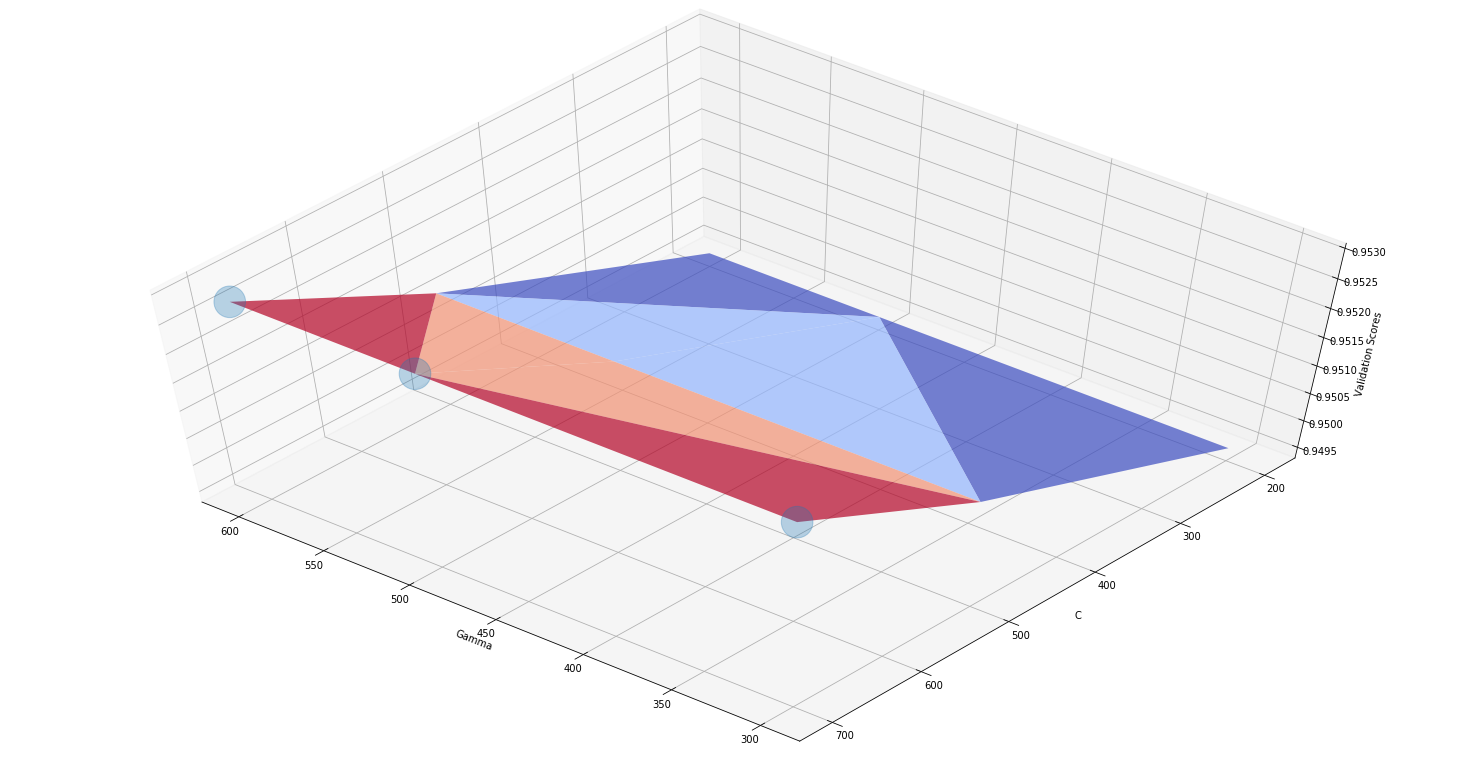

In [66]:
#Plot 3D Surface plot
fig = plt.figure()
ax = Axes3D(fig)
x_rf = rf_scores['param_max_depth'].values
y_rf = rf_scores['param_n_estimators'].values
z_rf = rf_scores['mean_test_score'].values
ax.plot_trisurf(list(x_rf), list(y_rf), list(z_rf), cmap=cm.coolwarm, alpha=0.7)
#Mark Optimal Paramters on Graph
ax.scatter3D(rf_x, rf_y, rf_z, s= 1000, alpha = 0.3)
#Graph Labels
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('Validation Scores')
ax.dist=12
fig = plt.gcf()
fig.set_size_inches(20, 10.5, forward= True)
ax.view_init(elev=60, azim=130)
plt.show()

<h4>Describe Surfcae-Plot</h4>

Here we have a very interesting scenario - there are 3 hyperprameter combinations that are indistiguishable from one another in their performance. Whats more interesting is that they show that, in this instance, the tree depth is some-what of a redundant paramter. By setting the number of trees to **700** any combination of tree depth will generate a *perfect* training score, which is a strong indication of overfitting. 

The relationship described by this plot is a linear proportionality between both parameters and the validation score.

<h4>Fit Optimal Model</h4>

Given that any <code>max_depth</code> corresponds to an optimal solution i will choose the least complex (i.e. <code>max_depth = 300</code>) in the hope that the model will generalise better the test dataset

In [105]:
rf_class_optimal = RandomForestClassifier(bootstrap=True,
                                  class_weight = 'balanced_subsample',
                                  random_state = 42,
                                  oob_score = True, 
                                  n_jobs = -1,
                                  max_depth = 300,
                                  n_estimators = 700)

In [106]:
#Fit model to training data
rf_class_optimal.fit(Xtrain_pca, yTrain_label)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=300, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [107]:
#Predict Using final model
rf_optimal_predict = rf_class_optimal.predict(Xtest_pca)

Model Accuracy is: 0.5568
Model F1 Score is: 0.5577


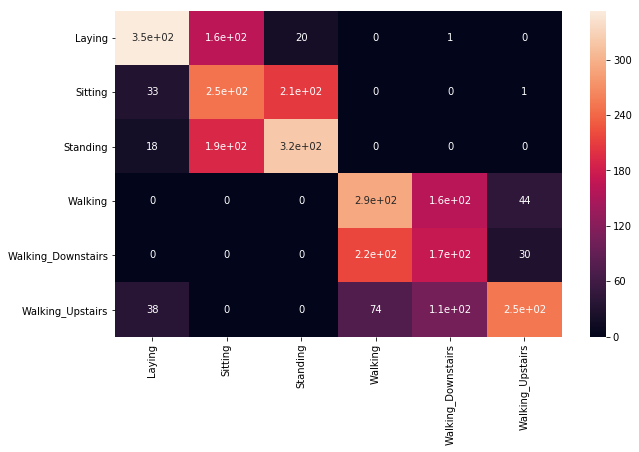

In [108]:
#Confusion Matrix
evaluateModel(rf_optimal_predict,yTest_label,uniqueClasses)

<h2>Discussion</h2>

<h3>Best Performing Model</h3>

The Model that performed best was **Logistic Regression with Elastic Net** 

<ul>
    <li>The Logistic Regression Algorithm leaverages a regulisation function, ElasticNet, that through a combination of L1 and L2 regularisation balances model complexity by penalising overly complex models. Thus producing a model that that captures adequate variation from the data while maintaining generality </li>
    <li>I believe that the simplicity of the model proved to be its biggest strength in this instance</li>
    <li>By utilising this regulisation technique LogReg was able to out perform more sophisticated architectures such as RandomForest and SVM</li>
    <li>From the confusion matrix we can see that the model was able to draw clear decision boundry between most classes. With the exception of:
        <ul>
            <li>Walking and Walking Downstairs</li>  
            <li>Standing and Sitting</li>    
        </ul>
        Which kind of makes sense - however it's interesting to note that Walking Upstairs was clearly segregated - perhaps the accelerometer produces clearer results when ascending as compared to decending (food for thought)
    </li>
</ul>

<h3>Worst Performing Model</h3>

The model that performed wrost was **Random Forest** 

<ul>
    <li>Random Forest is an example of ensemble model and while they are extreemly powerful models they can produce overly complex architectures - a clear illustration of this is the perfect training scores produced by the model during the CV run. This complexity means that the model captured too much variance or noise from the training data and as such does not generalise well to unseen datasets. A phenomena called overfitting</li>
    <li>It is possible that due to overfitting the boundries created by the model were too convoluted and thus when presented with the new dataset (i.e. testing data) it was unable to draw a clear distinction between classes using  its heuristics paramters. This is evidant from the confusion matrix. The model struggles to classify subjects that are Sitting. The result is an almost even distribution amongst Standing, Sitting or Laying down. The same can be seen in Walking Downstairs </li>
    <li>In addition, there were 3 combinations of hyperparameters that were indistiguishable from one another in their performance. Whats more interesting is that they show that, in this instance, the tree depth is some-what of a redundant paramter. By setting the number of trees to **700** any combination of tree depth will generate a *perfect* training score, which is a strong indication of overfitting. </li>
</ul>

<h3>Improve Models Performance</h3>

There are a number of ways you can improve model performance - tweeking parameters and/or experimenting with different techniques - however, in this instance I believe the 3 approaches that would yield the greatest improvement would be:

<ul>
    <li>1. More data! Because there are so many features (561) we need a large number of observation to help construct a generalisable model archeticture. Therefore, more data points would have a profound effect on model performance  </li>
    <li>2. Expand parameter range. The range of values used for hyperpramater tuning in the Grid Reach algorithm are somewhat limited, in some instaces only give a choice of only 2 value, as such an expanded and more diverse range could have a positive outcome</li>
        <li>3. Combine with orther datasets avaliable to create a richer the feature space</li>
</ul>
